# **2021 Scholarly Writing Challenge Notebook:** Using Machine Learning Approaches to Predict a Relapse in Schizophrenia

### Vikas Nibhanupudi

### **Overview of Notebook:** 


1.   Importing modules and data preprocessing
2.   Testing Logistic Regression, MLP Classifier, and K-Nearest Neighbors ML models

    a.   Tests 1: No hyperparamater optimization or principle component analysis (PCA)

    b. Tests 2: Hyperparameter optimization but no PCA

    c. Tests 3: Hyperparameter optimization and PCA

3. Final Results



## **1. Importing Modules and Data Preprocessing**


In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, RFE
from sklearn.model_selection import TimeSeriesSplit
from sklearn.decomposition import PCA


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


# Reading data
raw_data = pd.read_csv('/content/drive/My Drive/Stem Fellowship Research Data and Paper/CrossCheck_Daily_Data.csv')
raw_data = raw_data.drop(columns=['study_id'],axis = 1)
crosscheck_data = raw_data.dropna()
ema_descriptions = pd.read_table('/content/drive/My Drive/Stem Fellowship Research Data and Paper/ema_descriptions.tsv', index_col=1, usecols=[1,2,3])
feature_descriptions = pd.read_table('/content/drive/My Drive/Stem Fellowship Research Data and Paper/feature_descriptions.tsv', index_col=0)


In [ ]:
# Examining raw data 
nrows= len(crosscheck_data) 
ncols = len(crosscheck_data.columns) 
print("Number of rows in dataset:", nrows)
print("Number of columns in dataset:", ncols)
crosscheck_data.head(10)  

Number of rows in dataset: 5338
Number of columns in dataset: 154


,eureka_id,day,act_in_vehicle_ep_0,act_in_vehicle_ep_1,act_in_vehicle_ep_2,act_in_vehicle_ep_3,act_in_vehicle_ep_4,act_on_bike_ep_0,act_on_bike_ep_1,act_on_bike_ep_2,act_on_bike_ep_3,act_on_bike_ep_4,act_on_foot_ep_0,act_on_foot_ep_1,act_on_foot_ep_2,act_on_foot_ep_3,act_on_foot_ep_4,act_running_ep_0,act_running_ep_1,act_running_ep_2,act_running_ep_3,act_running_ep_4,act_still_ep_0,act_still_ep_1,act_still_ep_2,act_still_ep_3,act_still_ep_4,act_tilting_ep_0,act_tilting_ep_1,act_tilting_ep_2,act_tilting_ep_3,act_tilting_ep_4,act_unknown_ep_0,act_unknown_ep_1,act_unknown_ep_2,act_unknown_ep_3,act_unknown_ep_4,act_walking_ep_0,act_walking_ep_1,act_walking_ep_2,...,light_std_ep_3,light_std_ep_4,loc_dist_ep_0,loc_dist_ep_1,loc_dist_ep_2,loc_dist_ep_3,loc_dist_ep_4,loc_visit_num_ep_0,loc_visit_num_ep_1,loc_visit_num_ep_2,loc_visit_num_ep_3,loc_visit_num_ep_4,quality_activity,quality_audio,quality_gps_on,quality_light,quality_loc,sleep_duration,sleep_end,sleep_start,sms_in_num_ep_0,sms_in_num_ep_1,sms_in_num_ep_2,sms_in_num_ep_3,sms_in_num_ep_4,sms_out_num_ep_0,sms_out_num_ep_1,sms_out_num_ep_2,sms_out_num_ep_3,sms_out_num_ep_4,unlock_duration_ep_0,unlock_duration_ep_1,unlock_duration_ep_2,unlock_duration_ep_3,unlock_duration_ep_4,unlock_num_ep_0,unlock_num_ep_1,unlock_num_ep_2,unlock_num_ep_3,unlock_num_ep_4
15,u004,20150206,4639,0,1847,2384,408,351,0,219,132,0,644,0,170,34,440,0,0,0,0,0,79348,21599,19291,18831,19627,236,0,31,57,148,1181,0,42,162,977,0,0,0,...,5.873673e-01,52.333745,49841.420179,0.000000,21586.572087,26221.614742,2033.233349,2.0,1.0,2.0,2.0,1.0,24,24,1.0,24,24.0,7.50,88,28,0,0,0,0,0,0,0,0,0,0,730.407,0.000,255.949,28.152,446.306,14,0,4,2,8
22,u004,20150213,2873,0,0,0,2873,31,0,0,0,31,171,0,0,0,171,0,0,0,0,0,82872,21599,21600,21599,18074,300,0,0,1,299,152,0,0,0,152,0,0,0,...,2.776089e+01,996.162481,26703.917403,0.000000,0.000000,0.000000,26703.917403,2.0,1.0,1.0,1.0,2.0,24,24,1.0,24,24.0,7.75,88,26,0,0,0,0,0,0,0,0,0,0,304.928,0.000,10.210,0.000,294.718,9,0,1,0,8
25,u004,20150216,297,0,0,297,0,0,0,0,0,0,2556,0,0,2556,0,0,0,0,0,0,82002,21599,21600,17246,21557,161,0,0,147,14,1383,0,0,1354,29,0,0,0,...,4.951442e+03,32.318138,2414.482357,0.000000,120.517095,2293.965262,0.000000,1.0,1.0,1.0,1.0,1.0,24,24,1.0,24,24.0,6.75,86,32,0,0,0,0,0,0,0,0,0,0,275.660,0.000,0.000,37.605,238.055,4,0,0,2,2
27,u004,20150218,6296,1822,2516,1958,0,22,0,22,0,0,7258,366,1497,4506,889,0,0,0,0,0,64764,19344,15396,9481,20543,1670,65,652,891,62,6389,2,1517,4764,106,0,0,0,...,1.485045e+06,26612.005987,25355.929376,25355.929376,0.000000,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0,16,24,1.0,24,5.0,5.50,88,44,0,0,0,0,0,0,0,0,0,0,5919.168,40.248,2641.238,3146.014,91.668,49,3,17,26,3
29,u004,20150220,4945,1,0,2602,2342,21,0,0,21,0,9404,0,828,5617,2959,0,0,0,0,0,58886,14044,20440,9757,14645,10147,7546,113,1853,635,2996,8,219,1750,1019,0,0,0,...,1.429285e+06,220.577973,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,15,24,1.0,24,0.0,4.25,58,24,9,0,0,7,2,5,0,0,5,0,5038.623,30.908,254.616,3792.201,960.898,74,2,7,52,13
47,u004,20150325,75,0,60,15,0,0,0,0,0,0,98,0,54,44,0,0,0,0,0,0,77501,21599,20061,14241,21600,8264,0,1239,7025,0,461,0,186,275,0,0,0,0,...,4.684016e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,6,22,1.0,22,22.0,13.50,108,0,2,0,0,2,0,2,0,0,2,0,1966.121,14.831,594.938,1356.352,0.000,35,1,15,19,0
75,u005,20150204,2500,0,1618,574,308,0,0,0,0,0,619,0,519,100,0,0,0,0,0,0,82676,21598,19028,20796,21254,362,1,224,104,33,242,0,211,26,5,0,0,0,...,7.045869e+04,22035.493628,24398.684587,0.000000,18146.297923,540.360132,1952.051260,3.0,1.0,2.0,1.0,1.0,24,24,1.0,24,21.0,12.00,96,0,0,0,0,0,0,0,0,0,0,0,432.096,0.000,10.405,261.130,160.561,12,0,1,6,5
77,u005,20150206,1701,0,880,821,0,37,0,37,0,0,1192,0,727,465,0,0,0,0,0,0,83092,21598,19727,20168,21599,218,1,105,111,1,159,0,124,35,0,0,0,0,...,7.434071e+03,0.000000,11198.536087,0.000000,5283.108158,5608.220166,0.000000,1.0,1.0,1.0,1.0,1.0,24,24,1.0,24,16.0,10.50,84,0,0,0,

In [ ]:
# Dropping certain columns and filtering data before implementing ML models
X = crosscheck_data.drop([c for c in crosscheck_data.columns if 'ema' in c] + ['eureka_id', 'day'], axis=1) 
y = crosscheck_data[['ema_score']] <= 8 

# Splitting data into training and testing data (75-25 ratio)
X_train, X_test, y_train, y_test = train_test_split(X,y)


## **2. Testing Logistic Regression, MLP Classifier, and K-Nearest Neighbors ML Models**


### **2. a) Tests 1: No Hyperparamater Optimization or Principle Component Analysis (PCA)**


**Logistic Regression**

In [ ]:
## Tests 1: Logistic Regression
model = LogisticRegression() 
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
print(accuracy_score(y_pred, y_test) * 100)

57.528089887640455


**MLP Classifier**

In [ ]:
## Tests 1: MLP Classifier
model1 = MLPClassifier()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(accuracy_score(y_pred1, y_test)*100)

60.37453183520599


**K-Nearest Neighbors**

In [ ]:
## Tests 1: KNeighborsClassifier
model2 = KNeighborsClassifier()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(accuracy_score(y_pred2, y_test)*100)

58.27715355805243


### **Tests 1: Results**
Logistic Regression: 57.53%

MLP Classifier: 60.37% 

K-Nearest Neighbors: 58.28% 


### **Visualizing Results in Confusion Matrices**
Allows for identification of false positives and false negatives, an important distinction.

0 - not at risk of relapse 

1 - at risk of relapse

**Logistic Regression**

Text(0.5, 384.16, 'Predicted Diagnosis')

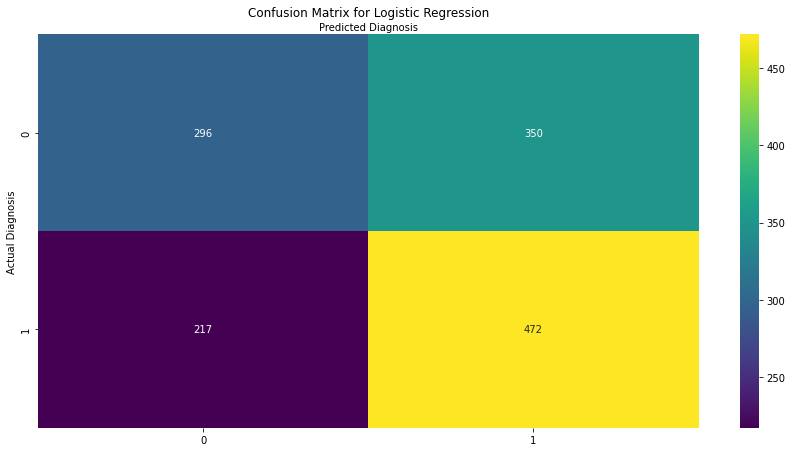

In [ ]:
# Create the Confusion Matrix for Logistic Regression
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Visualizing the Confusion Matrix
class_names = [0, 1] 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix for Logistic Regression', y = 1.1)
plt.ylabel('Actual Diagnosis')
plt.xlabel('Predicted Diagnosis')

**MLP Classifier**

Text(0.5, 384.16, 'Predicted Diagnosis')

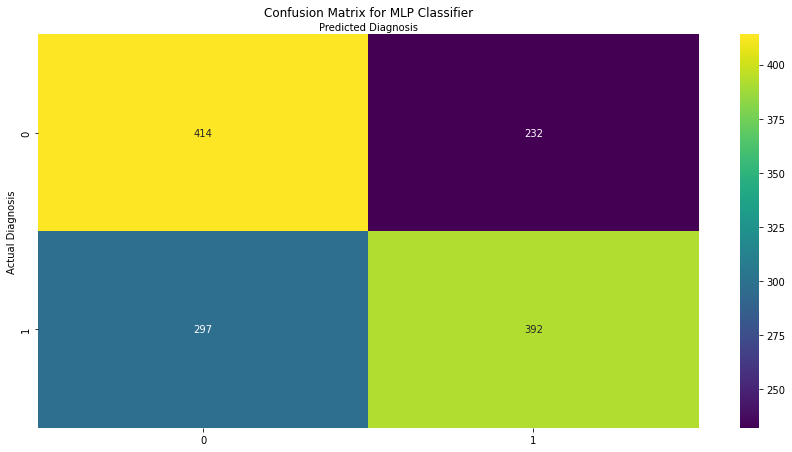

In [ ]:
# Create the Confusion Matrix MLP Classifier
cnf_matrix = metrics.confusion_matrix(y_test, y_pred1)

# Visualizing the Confusion Matrix
class_names = [0, 1] 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix for MLP Classifier', y = 1.1)
plt.ylabel('Actual Diagnosis')
plt.xlabel('Predicted Diagnosis')


**K-Nearest Neighbors**

Text(0.5, 384.16, 'Predicted Diagnosis')

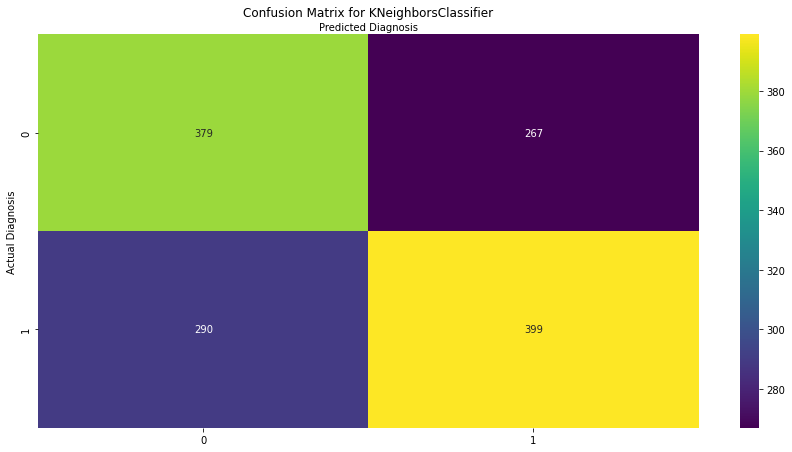

In [ ]:
# Create the Confusion Matrix KNeighborsClassifier
cnf_matrix = metrics.confusion_matrix(y_test, y_pred2)

# Visualizing the Confusion Matrix
class_names = [0, 1] 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix for KNeighborsClassifier', y = 1.1)
plt.ylabel('Actual Diagnosis')
plt.xlabel('Predicted Diagnosis')

### **2. b) Tests 2: Hyperparameter Optimization but no PCA**

**Logistic Regression**

In [ ]:
## Tests 2: Logistic Regression
newModel = LogisticRegression() 
cv = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
param_grid = [
  {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
   'C' : np.logspace(0, 10, 6),
   'solver' : ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
   }
]

# Performing GridSearch
clf = GridSearchCV(newModel, param_grid = param_grid, cv = cv, verbose = True, n_jobs = -1)

In [ ]:
best_clf = clf.fit(X_train, y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


In [ ]:
# Determining best hyperparameters
best_clf.best_estimator_

LogisticRegression(C=100000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
## Testing accuracy after hyperparameter tuning
modelLogisticRegressionNew = LogisticRegression(C=100000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

modelLogisticRegressionNew.fit(X_train, y_train)

y_predNew = modelLogisticRegressionNew.predict(X_test)

print(accuracy_score(y_predNew, y_test)*100)


64.56928838951312


**MLP Classifier**

In [ ]:
## Tests 2: MLP Classifier
newModel2 = MLPClassifier() 
cv2 = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
param_grid2 = [
  {'hidden_layer_sizes' : [(50,50,50), (50,100,50), (100,), (50,), (20,)],
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
   'solver' : ['lbfgs', 'sgd', 'adam']
   }
]

# Performing GridSearch
clf2 = GridSearchCV(newModel2, param_grid = param_grid2, cv = cv2, verbose = True, n_jobs = -1)

In [ ]:
best_clf2 = clf2.fit(X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


In [ ]:
# Determining best hyperparameters
best_clf2.best_estimator_

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
## Testing accuracy after hyperparameter tuning
modelMLPClassifierNew = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


modelMLPClassifierNew.fit(X_train, y_train)

y_predNew1 = modelMLPClassifierNew.predict(X_test)

print(accuracy_score(y_predNew1, y_test)*100)


63.146067415730336


**K-Nearest Neighbors**

In [ ]:
## Tests 2: K-Nearest Neighbors
newModel4 = KNeighborsClassifier() 
cv4 = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
param_grid4 = [
  {'n_neighbors' : [1, 3, 5, 7, 9],
    'weights' : ['uniform'],
   'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
   'leaf_size' : [2, 5, 8],
   'metric' : ['minkowski', 'euclidean', 'manhattan'],
   'p' : [1]
   }
]

# Performing GridSearch
clf4 = GridSearchCV(newModel4, param_grid = param_grid4, cv = cv4, verbose = True, n_jobs = -1)

In [ ]:
best_clf4 = clf4.fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


In [ ]:
# Determining best hyperparameters
best_clf4.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='uniform')

In [ ]:
## Testing accuracy after hyperparameter tuning
modelKNeighborsNew = KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='uniform')

modelKNeighborsNew.fit(X_train, y_train)

y_predNew4 = modelKNeighborsNew.predict(X_test)

print(accuracy_score(y_predNew4, y_test)*100)

62.92134831460674


### **Tests 2: Results**
Logistic Regression: 64.57%

MLP Classifier: 63.15% 

K-Nearest Neighbors: 62.92% 


### **2. c) Tests 3: Hyperparameter Optimization and PCA**

In [ ]:
# Standardize data before implementing PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


Text(0, 0.5, 'Explained Variance')

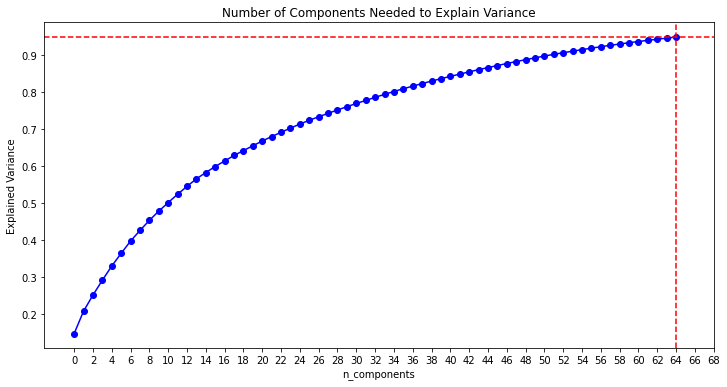

In [ ]:
# Determining number of components required to explain 95% of variance
plt.title('Number of Components Needed to Explain Variance')
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-', color='b')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.xticks(np.arange(0, 70, step=2))
plt.axvline(x=64, color='r', linestyle='--')
plt.xlabel('n_components')
plt.ylabel('Explained Variance')

As shown in the above diagram, to ensure that 95% of variance is accounted for, n_components must equal 64.

In [ ]:
# selecting the specific 64 components to explain 95% of variance
pca = PCA(n_components=64)
pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)

X_test_pca = pca.transform(X_test_scaled)


**Logistic Regression**

In [ ]:
# Tests 3: Logistic Regression
modelPCALR = LogisticRegression(C=100000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

modelPCALR.fit(X_train_pca, y_train)

y_predPCALR = modelPCALR.predict(X_test_pca)

score = accuracy_score(y_predPCALR, y_test)
print(score*100)

64.8689138576779


**MLP Classifier**

In [ ]:
# Tests 3: MLP Classifier
modelPCAMLP = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

modelPCAMLP.fit(X_train_pca, y_train)

y_predPCAMLP = modelPCAMLP.predict(X_test_pca)

score = accuracy_score(y_predPCAMLP, y_test)

print(score*100)

71.16104868913857


**K-Nearest Neighbors**

In [ ]:
# Tests 3: K-Nearest Neighbors
modelPCAKN = KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='uniform')

modelPCAKN.fit(X_train_pca, y_train)

y_predPCAKN = modelPCAKN.predict(X_test_pca)

score = accuracy_score(y_predPCAKN, y_test)
print(score*100)

69.3632958801498


### **Tests 3: Results**
Logistic Regression: 64.87%

MLP Classifier: 71.16% 

K-Nearest Neighbors: 69.36% 


### **Visualizing Results in Confusion Matrices**
Allows for identification of false positives and false negatives, an important distinction.

0 - not at risk of relapse 

1 - at risk of relapse

Text(0.5, 384.16, 'Predicted Diagnosis')

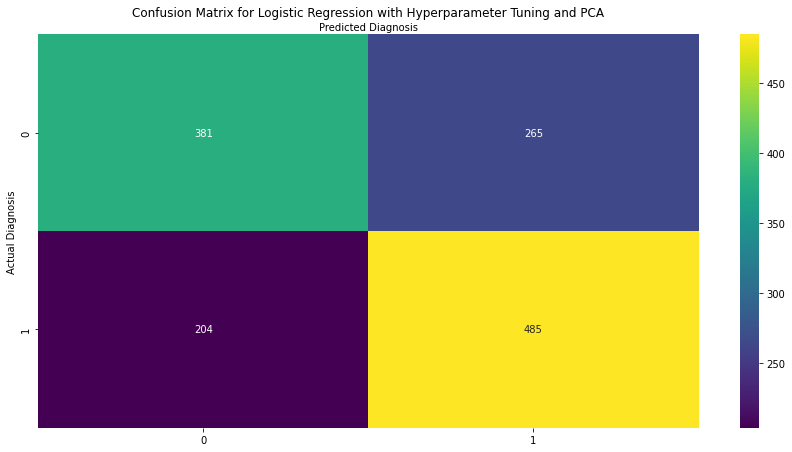

In [ ]:
# Create the Confusion Matrix for Logistic Regression with Hyperparameter Tuning and PCA
cnf_matrix = metrics.confusion_matrix(y_test, y_predPCALR)

# Visualizing the Confusion Matrix
class_names = [0, 1] 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix for Logistic Regression with Hyperparameter Tuning and PCA', y = 1.1)
plt.ylabel('Actual Diagnosis')
plt.xlabel('Predicted Diagnosis')

Text(0.5, 384.16, 'Predicted Diagnosis')

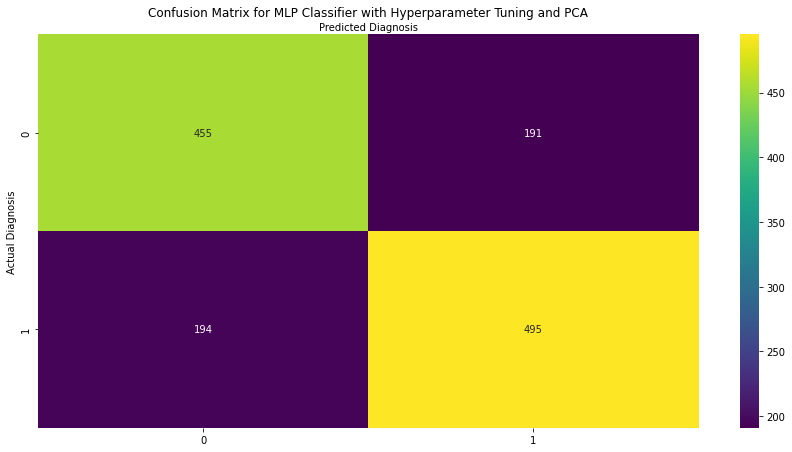

In [ ]:
# # Create the Confusion Matrix for MLP Classifier with Hyperparameter Tuning and PCA
cnf_matrix = metrics.confusion_matrix(y_test, y_predPCAMLP)

# Visualizing the Confusion Matrix
class_names = [0, 1] 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix for MLP Classifier with Hyperparameter Tuning and PCA', y = 1.1)
plt.ylabel('Actual Diagnosis')
plt.xlabel('Predicted Diagnosis')

Text(0.5, 384.16, 'Predicted Diagnosis')

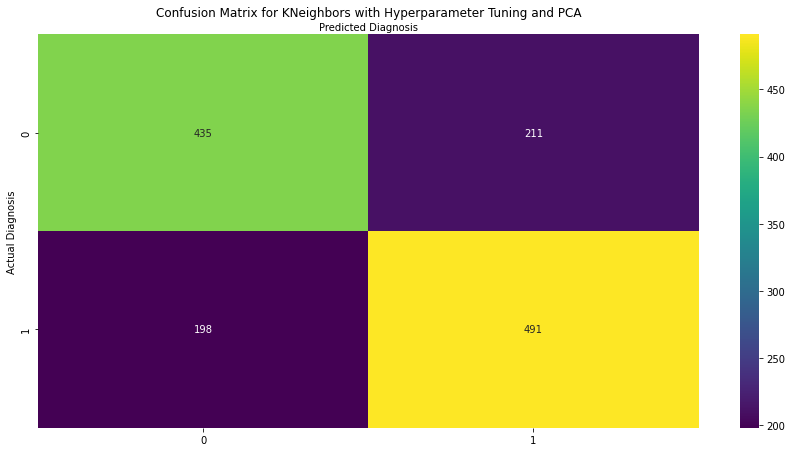

In [ ]:
# Create the Confusion Matrix for K-Nearest Neighbors with Hyperparameter Tuning and PCA
cnf_matrix = metrics.confusion_matrix(y_test, y_predPCAKN)

# Visualizing the Confusion Matrix
class_names = [0, 1] 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix for KNeighbors with Hyperparameter Tuning and PCA', y = 1.1)
plt.ylabel('Actual Diagnosis')
plt.xlabel('Predicted Diagnosis')

## **3. Final Results**


Comparison of Accuracy

|      **Model**      | **Accuracy Before Hyperparameter Optimization (%)** | **Accuracy After Hyperparameter Optimization (%)** | **Accuracy After Hyperparameter Optimization and PCA (%)** |
|:-------------------:|:---------------------------------------------------:|:--------------------------------------------------:|:----------------------------------------------------------:|
| MLP Classifier      | 60.37                                               | 63.15                                              | 71.16                                                      |
| Logistic Regression | 57.53                                               | 64.57                                              | 64.87                                                      |
| K-Nearest Neighbors | 58.28                                               | 62.92                                              | 69.36                                                      |


<br>

Comparison of False Negatives 



|      **Model**      | **False Negatives Before Hyperparameter Optimization** | **False Negatives After Hyperparameter Optimization and PCA** |
|:-------------------:|:------------------------------------------------------:|:-------------------------------------------------------------:|
| MLP Classifier      | 297                                                    | 194                                                           |
| Logistic Regression | 217                                                    | 204                                                           |
| K-Nearest Neighbors | 290                                                    | 198                                                           |

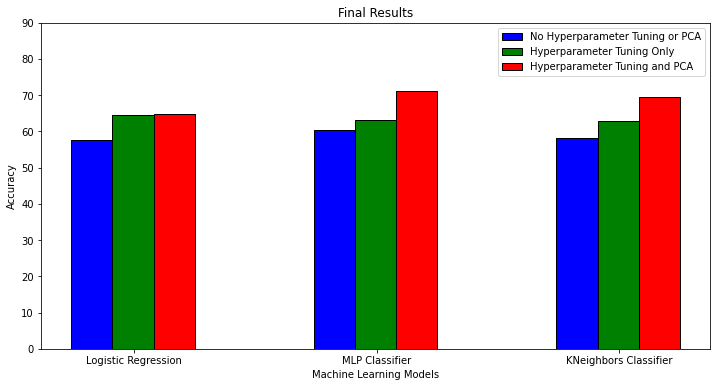

In [ ]:
# Plotting graph of results
no_hyperparameter_tuning = [57.53, 60.37, 58.28]
hyperparameter_tuning = [64.57, 63.15, 62.92]
hyperparameter_and_pca = [64.87, 71.16, 69.36]
  
n=3
r = np.arange(n)
width = 0.17
  
  
plt.bar(r, no_hyperparameter_tuning, color = 'b',
        width = width, edgecolor = 'black',
        label='No Hyperparameter Tuning or PCA')
plt.bar(r + width, hyperparameter_tuning, color = 'g',
        width = width, edgecolor = 'black',
        label='Hyperparameter Tuning Only')

plt.bar(r + 2 * width, hyperparameter_and_pca, color = 'r',
        width = width, edgecolor = 'black',
        label='Hyperparameter Tuning and PCA')
  
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy")
plt.title("Final Results")

plt.xticks(r + width/2 + 0.09,['Logistic Regression','MLP Classifier','KNeighbors Classifier'])
plt.legend()
plt.yticks(np.arange(0, 100, step=10))
  
plt.show()